# Лабораторная работа 1

## Создание "истории о данных" (Data Storytelling).

**Цель лабораторной работы**: изучение различных методов визуализация данных и создание истории на основе данных.

**Краткое описание**. Построение графиков, помогающих понять структуру данных, и их интерпретация.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Исследуем основные характеристики датасета

In [2]:
data = pd.read_csv("./Video_Games_Sales.csv")

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(16719, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
data['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

<AxesSubplot:>

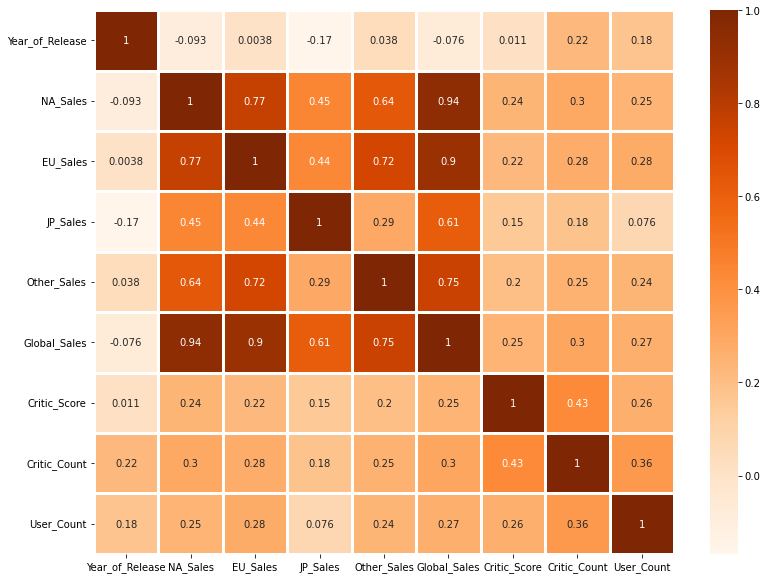

In [8]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Oranges", annot=True, linewidth=3)

Из матрицы корреляции видно, что наиболее сильно коррелируют показатели продаж Северной Америки и Европы

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

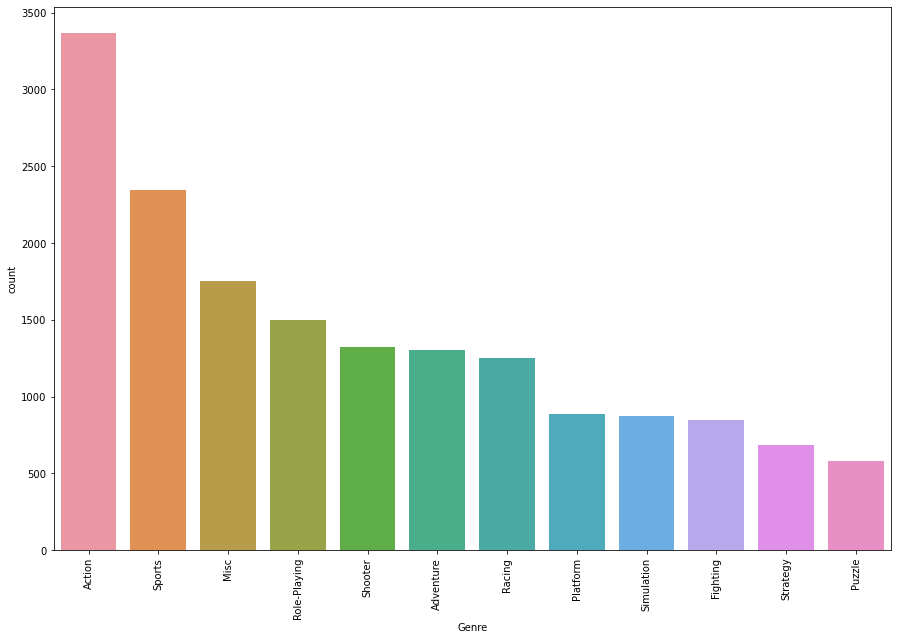

In [9]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

Из гистограммы видно, что больше всего игр в жанре "Action", меньше игра в жанре "Sports" и т.д. 

In [10]:
data_by_year = data.groupby(by  = 'Year_of_Release').sum()
data_by_year.drop(columns=["Critic_Count", "User_Count", "Critic_Score"],inplace=True)
data_by_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36
1985.0,33.73,4.74,14.56,0.92,53.94
1986.0,12.50,2.84,19.81,1.93,37.07
1987.0,8.46,1.41,11.63,0.20,21.74
1988.0,23.87,6.59,15.76,0.99,47.22


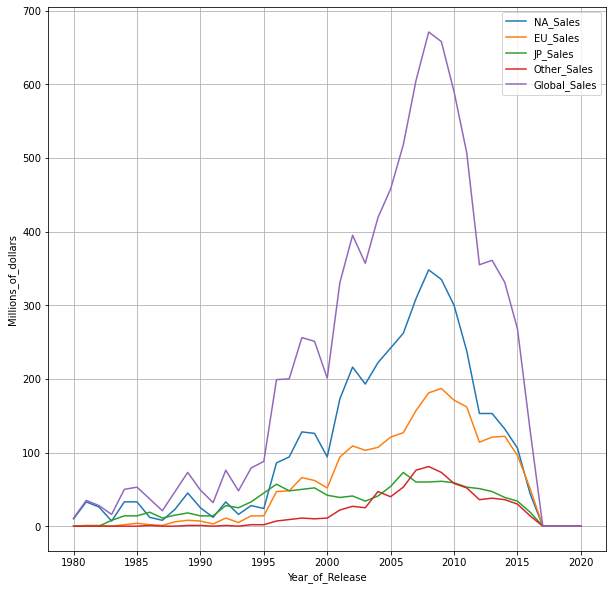

In [11]:
data_by_year=data_by_year.apply(lambda x : x.astype("int"))
data_by_year.plot.line(figsize=(10,10), grid="on");
plt.ylabel("Millions_of_dollars");

 Разбив игры по продажам в разные года по разным регионам, можно заметить, что наибольшие продажи игр по всему миру пришли на 2009 год. При этом, среди регионов больше всего игр было продано в Северной Америке, а меньше всего в Японии

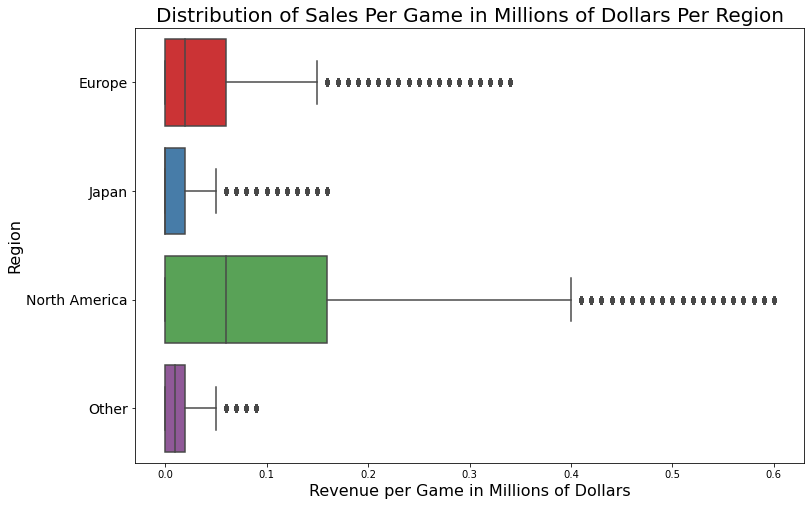

In [12]:
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['Europe', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(12,8))

colors = sns.color_palette("Set1", len(data))
ax = sns.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Game in Millions of Dollars', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Distribution of Sales Per Game in Millions of Dollars Per Region', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

Из диаграммы "Ящик с усами" видно, что Северная Америка лидирует по продажам игр как в размахе, так и по медианному значению

In [13]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "Region", 0: "Sales"})
top_sale_reg

,Region,Sales
0,NA_Sales,1674.46
1,EU_Sales,744.53
2,JP_Sales,242.07
3,Other_Sales,227.81


In [14]:
labels = top_sale_reg['Region']
sizes = top_sale_reg['Sales']

([<matplotlib.patches.Wedge at 0x7f8594f84250>,
 [Text(0.2723019312452782, -1.0657634156979174, 'NA_Sales'),
  Text(0.2836793891660941, 1.062791609000726, 'EU_Sales'),
  Text(-0.7982850337767683, 0.7567965412500403, 'JP_Sales'),
  Text(-1.0664161445551974, 0.2697343260173396, 'Other_Sales')],
 [Text(0.14852832613378808, -0.5813254994715913, '58.0%'),
  Text(0.15473421227241493, 0.5797045140003959, '25.8%'),
  Text(-0.4354282002418736, 0.4127981134091128, '8.4%'),
  Text(-0.581681533393744, 0.14712781419127613, '7.9%')])

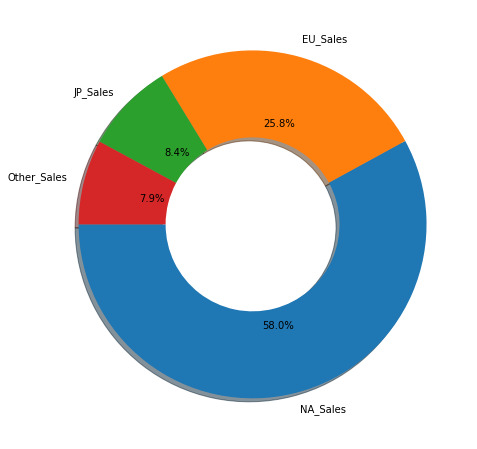

In [15]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.5), shadow=True, startangle=180)

Из кольцевой диаграммы также видно, что Северная Америка имеет наибольшую долю продаж во всем мире

На основании проведенного анализа можно сделать следующий вывод: 

*   Наиболее популярным жанром игр во всем мире является "Action";
*   Самую большую долю продаж в мире имеет Северная Америка;
*   В 2009 году произошел скачок продаж видеоигр по всему миру, кроме Японии.
